In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

In [36]:
COVID = pd.read_csv('CDPHE_COVID19_Daily_State_Statistics.csv')                             #Load Data
COVID = COVID.iloc[:-4]                                                                     #Drop last 4 rows (They're just notes)

#Cases
COVID['dCases'] = COVID['Cases']-COVID['Cases'].shift(1)                                   #Calculate daily new cases
COVID['7DayAvg'] = COVID.iloc[:,13].rolling(window=7).mean()                               #Calculate 7 day avg of new cases
COVID['d7Day']=(COVID['7DayAvg']-COVID['7DayAvg'].shift(7))/COVID['7DayAvg'].shift(7)*100  #Calculate $ change from 1 week ago

#Hospitilzations and Deaths
COVID['dHosp'] = COVID['Hosp']-COVID['Hosp'].shift(1) 
COVID['7DayHosp'] = COVID['dHosp'].iloc[:].rolling(window=7).mean()  
COVID['dDeath'] = COVID['Deaths']-COVID['Deaths'].shift(1)  
COVID['7DayDeath'] = COVID['dDeath'].iloc[:].rolling(window=7).mean()  

#By onset date
Onset = pd.read_csv('Onset.csv') 
Onset['dCases'] = Onset['Cases']-Onset['Cases'].shift(1)   
Onset['7DayAvg'] = Onset.iloc[:,1].rolling(window=7).mean() 
Onset['d7Day']=(Onset['7DayAvg']-Onset['7DayAvg'].shift(7))/Onset['7DayAvg'].shift(7)*100

In [34]:
COVID.head(30)

,Name,Desc_,Date,Cases,Tested,Deaths,DthCOVID19,Population,Rate,Hosp,Counties,Outbreaks,ObjectId,dCases,7DayAvg,d7Day,dHosp,7DayHosp,dDeath,7DayDeath
0,Colorado,State Data,03/17/2020,183.0,1790.0,2.0,NaN,5694287.0,3.21,20.0,19.0,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Colorado,State Data,03/18/2020,216.0,2328.0,2.0,NaN,5694287.0,3.79,26.0,20.0,NaN,2,33.0,NaN,NaN,6.0,NaN,0.0,NaN
2,Colorado,State Data,03/19/2020,277.0,2952.0,2.0,NaN,5694287.0,4.86,42.0,22.0,NaN,3,61.0,NaN,NaN,16.0,NaN,0.0,NaN
3,Colorado,State Data,03/20/2020,363.0,3680.0,4.0,NaN,5694287.0,6.37,44.0,24.0,NaN,4,86.0,NaN,NaN,2.0,NaN,2.0,NaN
4,Colorado,State Data,03/21/2020,475.0,4550.0,5.0,NaN,5694287.0,8.34,49.0,29.0,NaN,5,112.0,NaN,NaN,5.0,NaN,1.0,NaN
5,Colorado,State Data,03/22/2020,591.0,5436.0,6.0,NaN,5694287.0,10.38,58.0,29.0,5.0,6,116.0,NaN,NaN,9.0,NaN,1.0,NaN
6,Colorado,State Data,03/23/2020,720.0,6224.0,7.0,NaN,5694287.0,12.64,72.0,31.0,5.0,7,129.0,NaN,NaN,14.0,NaN,1.0,NaN
7,Colorado,State Data,03/24/2020,912.0,7701.0,11.0,NaN,5694287.0,16.02,84.0,35.0,7.0,8,192.0,104.142857,NaN,12.0,9.142857,4.0,1.285714
8,Colorado,State Data,03/25/2020,1086.0,8064.0,19.0,NaN,5694287.0,19.07,148.0,36.0,9.0,9,174.0,124.285714,NaN,64.0,17.428571,8.0,2.428571
9,Colorado,State Data,03/26/2020,1430.0,10122.0,24.0,NaN,5694287.0,25.11,184.0,39.0,9.0,10,344.0,164.714286,NaN,36.0,20.285714,5.0,3.142857


C:\Users\Soltys\anaconda3\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
C:\Users\Soltys\anaconda3\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


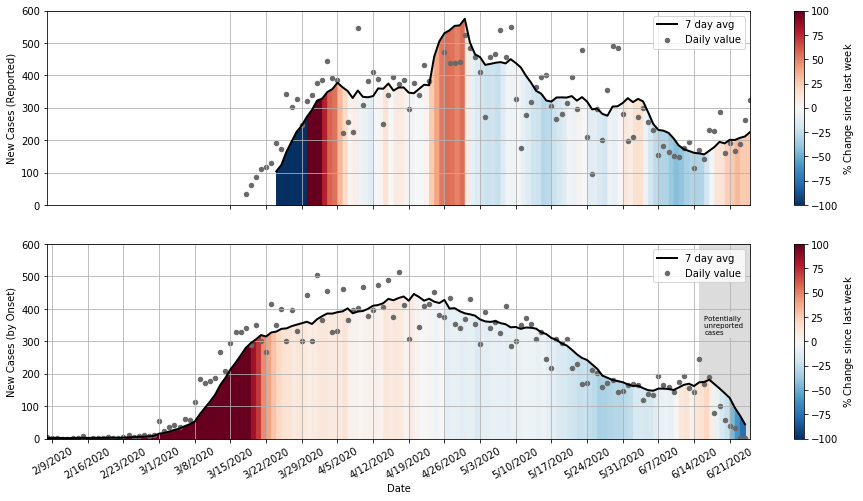

In [69]:
plt.rcParams['figure.figsize'] = [40/2.54, 20/2.54]
fig, axs = plt.subplots(nrows=2, ncols=1,facecolor='white')

######## By Date Reported ###########
#Plot 7-day avg line
N=len(COVID)
COVID.plot(x="Date",y="7DayAvg",linewidth=2,label='7 day avg',color='k',ax=axs[0])

#Fill with colors by slope
cmap = mpl.cm.RdBu.reversed()
normalize = mpl.colors.Normalize(vmin=-100, vmax=100)
for i in range(1,N):
    axs[0].fill_between(x=COVID["Date"][i-1:i+1],y1=COVID["7DayAvg"][i-1:i+1],y2=0, color=cmap(normalize(COVID["d7Day"][i])))

#Plot daily points
COVID.plot(x="Date",y="dCases",label="Daily value",kind='scatter',ax=axs[0],color='dimgrey')

#Make plot look better
xTicks=np.arange(-2, N, 7)
axs[0].set(xlabel='',ylabel='New Cases (Reported)',xticks=xTicks,xticklabels='',xlim=(-38, N-1),ylim=(0, 600))

axs[0].grid()

#show colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=normalize)
sm.set_array([])
plt.colorbar(sm,ax=axs[0],orientation='vertical',label='$\%$ Change since last week')

############# By Onset Date #############
N=len(Onset)
axs[1].fill_between(x=(N-10,N),y1=600,y2=0, color="gainsboro")
Onset.plot(x="Date",y="7DayAvg",linewidth=2,label='7 day avg',color='k',ax=axs[1])

cmap = mpl.cm.RdBu.reversed()
normalize = mpl.colors.Normalize(vmin=-100, vmax=100)

for i in range(1,N):
    axs[1].fill_between(x=Onset["Date"][i-1:i+1],y1=Onset["7DayAvg"][i-1:i+1],y2=0, color=cmap(normalize(Onset["d7Day"][i])))
    
Onset.plot(x="Date",y="Cases",label="Daily value",kind='scatter',ax=axs[1],color='dimgrey')

xTicks=np.arange(8, N, 7)
axs[1].set(xlabel='Date',ylabel='New Cases (by Onset)',xticks=xTicks,xticklabels=Onset["Date"][xTicks],xlim=(7, N),ylim=(0, 600))
axs[1].grid()
plt.xticks(rotation=30)


sm = plt.cm.ScalarMappable(cmap=cmap, norm=normalize)
sm.set_array([])
plt.colorbar(sm,ax=axs[1],orientation='vertical',label='$\%$ Change since last week')

bbox_props = dict(boxstyle="square,pad=0.4", fc="gainsboro", lw=0)
t = axs[1].text(N-9, 350, "Potentially \nunreported \ncases", ha="left", va="center", rotation=0,
            size=7,
            bbox=bbox_props)

################ Deaths and Hospilizations $################
#COVID.plot(x="Date",y="7DayHosp",linewidth=2,label='Hospitilizations (7 day avg)',color='g',ax=axs[2])
#COVID.plot(x="Date",y="Cases",label="Daily value",kind='scatter',ax=axs[1],color='dimgrey')
#COVID.plot(x="Date",y="7DayDeath",linewidth=2,label='Deaths (7 day avg)',color='r',ax=axs[2])


98

[(1, 10000), Text(0, 0.5, ''), Text(0.5, 0, 'Date')]

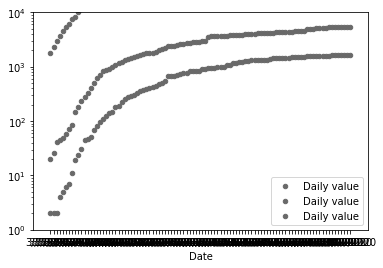

In [12]:
fig, axs = plt.subplots(nrows=1, ncols=1,facecolor='white')
COVID.plot(x="Date",y="Tested",label="Daily value",kind='scatter',ax=axs,color='dimgrey')
COVID.plot(x="Date",y="Hosp",label="Daily value",kind='scatter',ax=axs,color='dimgrey')
COVID.plot(x="Date",y="Deaths",label="Daily value",kind='scatter',ax=axs,color='dimgrey')
axs.set_yscale('log')
axs.set(xlabel='Date',ylabel='',ylim=(1, 10000))